Guidewire hackathon


Problem Statement: Kubernetes clusters can encounter failures such as pod crashes, resource bottlenecks, and network issues. The challenge in Phase 1 is to build an AI/ML model capable of predicting these issues before they occur by analysing historical and real-time cluster metrics.



Model Design: Build a model capable of predicting issues mentioned below as a minimal viable scope (more can also be accommodated):----
<li>Node or pod failures.
<li>Resource exhaustion (CPU, memory, disk).
<li>Network or connectivity issues.
<li>Service disruptions based on logs and events.








Prediction Accuracy: Focus on developing models that accurately forecast potential failures using techniques such as anomaly detection, time-series analysis, and other applicable techniques.


In [103]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/project guide wire/dataSynthetic.csv")

In [104]:
data.head()

,Timestamp,Pod Name,CPU Usage (%),Memory Usage (%),Pod Status,Pod Reason,Pod Restarts,Ready Containers,Total Containers,Pod Event Type,...,Network Receive Packets (p/s),Network Transmit Packets (p/s),Network Receive Packets Dropped (p/s),Network Transmit Packets Dropped (p/s),FS Reads Total (MB),FS Writes Total (MB),FS Reads/Writes Total (MB),FS Reads Bytes Total (MB),FS Writes Bytes Total (MB),FS Reads/Writes Bytes Total (MB)
0,2024-04-19 21:05:48,opentelemetry-demo-redis-68779558bb-4mjtr,0.230313,53.101612,Running,NaN,0,1,1,No recent events,...,3.768307,1.135357,2.153989,1.185063,0.000485,0.001514,0.001785,0.000310,0.000000,0.000331
1,2024-04-19 20:58:41,opentelemetry-demo-frontend-76f486559f-szlsh,14.612577,0.141409,Running,NaN,2,1,1,Normal,...,156.855681,356.949251,1.460284,10.050480,0.001362,0.000666,0.001240,0.000049,0.000000,0.000000
2,2024-04-18 22:13:38,opentelemetry-demo-frauddetectionservice-64cb6...,0.603365,12.191371,Running,NaN,0,1,1,Normal,...,4.474349,3.042058,3.968989,4.581325,0.001177,0.328530,0.357402,0.000326,0.003142,0.003002
3,2024-04-22 12:30:14,opentelemetry-demo-frauddetectionservice-64cb6...,0.077004,0.201204,Unknown,NaN,0,0,0,No recent events,...,1.393119,1.345098,0.861935,5.033863,0.000000,0.000771,0.000000,0.000396,0.000000,0.000205
4,2024-04-22 15:54:45,opentelemetry-demo-recommendationservice-7697d...,1.060736,43.678164,Running,NaN,0,1,1,No recent events,...,0.050636,0.094615,2.542782,7.614585,0.000000,0.001226,0.000493,0.000000,0.000279,0.000000


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Timestamp                                              100000 non-null  object 
 1   Pod Name                                               100000 non-null  object 
 2   CPU Usage (%)                                          100000 non-null  float64
 3   Memory Usage (%)                                       100000 non-null  float64
 4   Pod Status                                             100000 non-null  object 
 5   Pod Reason                                             0 non-null       float64
 6   Pod Restarts                                           100000 non-null  int64  
 7   Ready Containers                                       100000 non-null  int64  
 8   Total Containers                   

In [106]:
data.columns

Index(['Timestamp', 'Pod Name', 'CPU Usage (%)', 'Memory Usage (%)',
       'Pod Status', 'Pod Reason', 'Pod Restarts', 'Ready Containers',
       'Total Containers', 'Pod Event Type', 'Pod Event Reason',
       'Pod Event Age', 'Pod Event Source', 'Pod Event Message', 'Node Name',
       'Event Reason', 'Event Age', 'Event Source', 'Event Message',
       'Memory Usage (MB)', 'Active Memory Requests (MB)',
       'Memory Requests (%)',
       'Active Memory Limits (MB)emory Limits Utilization (%)',
       'Memory Usage (MB).1', 'Memory Usage (Cache) (MB)',
       'Memory Usage (Swap) (MB)', 'Network Receive Bytes',
       'Network Transmit Bytes', 'Network Receive Packets (p/s)',
       'Network Transmit Packets (p/s)',
       'Network Receive Packets Dropped (p/s)',
       'Network Transmit Packets Dropped (p/s)', 'FS Reads Total (MB)',
       'FS Writes Total (MB)', 'FS Reads/Writes Total (MB)',
       'FS Reads Bytes Total (MB)', 'FS Writes Bytes Total (MB)',
       'FS Reads/Write

In [107]:
list_event_msg = list(data["Event Message"].unique())
list_event_msg

['Node aks-npubuntu-25645003-vmss000004 event: Registered Node aks-npubuntu-25645003-vmss000004 in Controller',
 'Node condition VMEventScheduled is now: False, reason: NoVMEventScheduled, message: "VM has no scheduled event"',
 'Memory cgroup out of memory: Killed process 1191383 (node) total-vm:10957168kB, anon-rss:167288kB, file-rss:51460kB, shmem-rss:0kB, UID:1001 pgtables:4536kB oom_score_adj:975',
 'Memory cgroup out of memory: Killed process 1211463 (envoy) total-vm:2264348kB, anon-rss:31188kB, file-rss:36388kB, shmem-rss:4kB, UID:101 pgtables:268kB oom_score_adj:994',
 '(combined from similar events): Memory cgroup out of memory: Killed process 2777192 (ThreadPoolServi) total-vm:33917692kB, anon-rss:15960kB, file-rss:1492kB, shmem-rss:0kB, UID:0 pgtables:524kB oom_score_adj:872',
 '(combined from similar events): Memory cgroup out of memory: Killed process 170151 (chrome) total-vm:34101760kB, anon-rss:16576kB, file-rss:2856kB, shmem-rss:0kB, UID:0 pgtables:676kB oom_score_adj:8

In [108]:
for x in range(0, len(data["Event Message"])):
  if data["Event Message"][x] in list_event_msg:
    # Get the index of the actual event message, not the loop variable
    data["Event Message"][x] = list_event_msg.index(data["Event Message"][x])

In [109]:
data["Event Message"]

,Event Message
0,0
1,0
2,1
3,2
4,3
...,...
99995,1
99996,3
99997,3
99998,3


In [110]:
data["Event Message"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=object)

In [111]:
data["Pod Status"].unique()

array(['Running', 'Unknown', 'CrashLoopBackOff', 'Pending', 'Error',
       'ContainerCreating', 'NotFound'], dtype=object)

In [112]:
data["Event Message"][data["Pod Status"]=="CrashLoopBackOff"]

,Event Message
5,3
32,3
35,14
70,3
91,3
...,...
99958,3
99974,14
99976,3
99977,3


In [113]:
temp = data["Event Message"][data["Pod Status"]=="CrashLoopBackOff"].unique()
temp.sort()
temp

array([0, 1, 2, 3, 9, 13, 14, 16, 17, 18, 19, 21, 22, 25, 27, 30],
      dtype=object)

In [114]:
for _ in temp:
  print(list_event_msg[_])

Node aks-npubuntu-25645003-vmss000004 event: Registered Node aks-npubuntu-25645003-vmss000004 in Controller
Node condition VMEventScheduled is now: False, reason: NoVMEventScheduled, message: "VM has no scheduled event"
Memory cgroup out of memory: Killed process 1191383 (node) total-vm:10957168kB, anon-rss:167288kB, file-rss:51460kB, shmem-rss:0kB, UID:1001 pgtables:4536kB oom_score_adj:975
Memory cgroup out of memory: Killed process 1211463 (envoy) total-vm:2264348kB, anon-rss:31188kB, file-rss:36388kB, shmem-rss:4kB, UID:101 pgtables:268kB oom_score_adj:994
Memory cgroup out of memory: Killed process 16384 (checkoutservice) total-vm:1243800kB, anon-rss:19368kB, file-rss:13908kB, shmem-rss:0kB, UID:0 pgtables:156kB oom_score_adj:998
Node aks-npubuntu-25645003-vmss000003 status is now: NodeNotReady
Memory cgroup out of memory: Killed process 3190609 (envoy) total-vm:2264348kB, anon-rss:31268kB, file-rss:29636kB, shmem-rss:4kB, UID:101 pgtables:264kB oom_score_adj:994
Node condition Co

In [115]:
df=data

In [116]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame

# Check if "Timestamp" column exists before processing
if "Timestamp" in df.columns:
    # Convert timestamp column to datetime format
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])

    # Extract useful features from datetime
    df["Hour"] = df["Timestamp"].dt.hour
    df["Day"] = df["Timestamp"].dt.day
    df["Weekday"] = df["Timestamp"].dt.weekday
    df["Month"] = df["Timestamp"].dt.month

    # Drop original timestamp column
    df.drop(columns=["Timestamp"], inplace=True)
else:
    print("Timestamp column not found in DataFrame. Skipping datetime feature extraction.")


# Encode categorical columns
categorical_cols = ["Pod Name", "Pod Status", "Pod Event Type", "Event Reason"]
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Function to convert HH:MM:SS to seconds
def time_to_seconds(time_str):
    try:
        h, m, s = map(int, time_str.split(":"))
        return h * 3600 + m * 60 + s
    except (ValueError, AttributeError):
        # Handle cases where the value is not in HH:MM:SS format or is NaN
        return np.nan  # Or any other appropriate value

# Check if "Duration" column exists before applying the function
if "Duration" in df.columns:
    # Apply conversion
    df["Duration"] = df["Duration"].apply(time_to_seconds)
else:
    print("Duration column not found in DataFrame. Skipping duration conversion.")

# Verify all columns are numeric
df.info()

Duration column not found in DataFrame. Skipping duration conversion.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Pod Name                                               100000 non-null  int64  
 1   CPU Usage (%)                                          100000 non-null  float64
 2   Memory Usage (%)                                       100000 non-null  float64
 3   Pod Status                                             100000 non-null  int64  
 4   Pod Reason                                             0 non-null       float64
 5   Pod Restarts                                           100000 non-null  int64  
 6   Ready Containers                                       100000 non-null  int64  
 7   Total Containers                                  

In [117]:
list_cat = list(data.select_dtypes(include=['object']).columns)
print(list_cat)

['Pod Event Reason', 'Pod Event Age', 'Pod Event Source', 'Pod Event Message', 'Node Name', 'Event Age', 'Event Source', 'Event Message']


In [118]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
estimator = OrdinalEncoder()
df[list_cat]=estimator.fit_transform(df[list_cat])
df[list_cat]



,Pod Event Reason,Pod Event Age,Pod Event Source,Pod Event Message,Node Name,Event Age,Event Source,Event Message
0,4.0,102.0,0.0,33.0,4.0,915.0,3.0,0.0
1,1.0,1126.0,0.0,7.0,4.0,1445.0,5.0,0.0
2,4.0,613.0,0.0,30.0,2.0,591.0,1.0,1.0
3,4.0,102.0,0.0,0.0,4.0,432.0,3.0,2.0
4,4.0,102.0,0.0,0.0,4.0,2071.0,3.0,3.0
...,...,...,...,...,...,...,...,...
99995,1.0,582.0,0.0,8.0,2.0,345.0,1.0,1.0
99996,6.0,7.0,0.0,4.0,1.0,788.0,3.0,3.0
99997,6.0,1161.0,0.0,24.0,1.0,788.0,3.0,3.0
99998,4.0,102.0,0.0,0.0,4.0,788.0,3.0,3.0


In [119]:
list_num =["Memory Usage (MB)","Active Memory Requests (MB)","Memory Requests (%)","Active Memory Limits (MB)emory Limits Utilization (%)","Memory Usage (MB).1","Memory Usage (Cache) (MB)"]


In [120]:
from sklearn.preprocessing import StandardScaler

estimator = StandardScaler()
df[list_num]=estimator.fit_transform(df[list_num])
df[list_num]

,Memory Usage (MB),Active Memory Requests (MB),Memory Requests (%),Active Memory Limits (MB)emory Limits Utilization (%),Memory Usage (MB).1,Memory Usage (Cache) (MB)
0,-0.331169,-0.785530,0.193896,-0.776460,0.080191,-0.329345
1,0.295487,0.109301,1.100145,0.067161,1.123017,0.342800
2,1.156109,0.094387,1.893164,0.090859,1.155829,-0.326330
3,-0.452040,0.114272,-1.576552,0.081380,-1.539749,-0.329834
4,0.024520,-0.785530,0.477760,-0.776460,0.386802,-0.286936
...,...,...,...,...,...,...
99995,-0.207520,-0.636392,1.231850,-0.634277,0.844006,-0.216322
99996,-0.208238,-0.392799,-0.034399,-0.402044,-0.133746,-0.321591
99997,-0.451580,-0.785530,-1.411346,-0.776460,-1.394111,-0.329524
99998,-0.404060,-0.785530,0.497047,-0.681671,0.405709,-0.330317


In [121]:
rest=list(set(df.columns)-set(list_cat)-set(list_num))
rest

['Network Transmit Packets (p/s)',
 'FS Reads Bytes Total (MB)',
 'Hour',
 'CPU Usage (%)',
 'FS Reads/Writes Bytes Total (MB)',
 'Total Containers',
 'FS Reads/Writes Total (MB)',
 'Pod Name',
 'Pod Reason',
 'Ready Containers',
 'Day',
 'FS Reads Total (MB)',
 'Pod Restarts',
 'Weekday',
 'Network Transmit Bytes',
 'Event Reason',
 'Pod Status',
 'Memory Usage (%)',
 'Network Receive Bytes',
 'Month',
 'Memory Usage (Swap) (MB)',
 'Network Receive Packets (p/s)',
 'Network Receive Packets Dropped (p/s)',
 'Pod Event Type',
 'FS Writes Total (MB)',
 'FS Writes Bytes Total (MB)',
 'Network Transmit Packets Dropped (p/s)']

In [122]:


df_prep = pd.concat([df[list_cat], df[list_num], df[rest]], axis=1)

In [123]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Pod Event Reason                                       100000 non-null  float64
 1   Pod Event Age                                          100000 non-null  float64
 2   Pod Event Source                                       100000 non-null  float64
 3   Pod Event Message                                      100000 non-null  float64
 4   Node Name                                              100000 non-null  float64
 5   Event Age                                              100000 non-null  float64
 6   Event Source                                           100000 non-null  float64
 7   Event Message                                          100000 non-null  float64
 8   Memory Usage (MB)                  

In [124]:
df_prep.drop(columns=["Pod Reason"],inplace=True)

In [125]:
X=df_prep.drop(columns=["Event Message"])
y=df_prep["Event Message"]

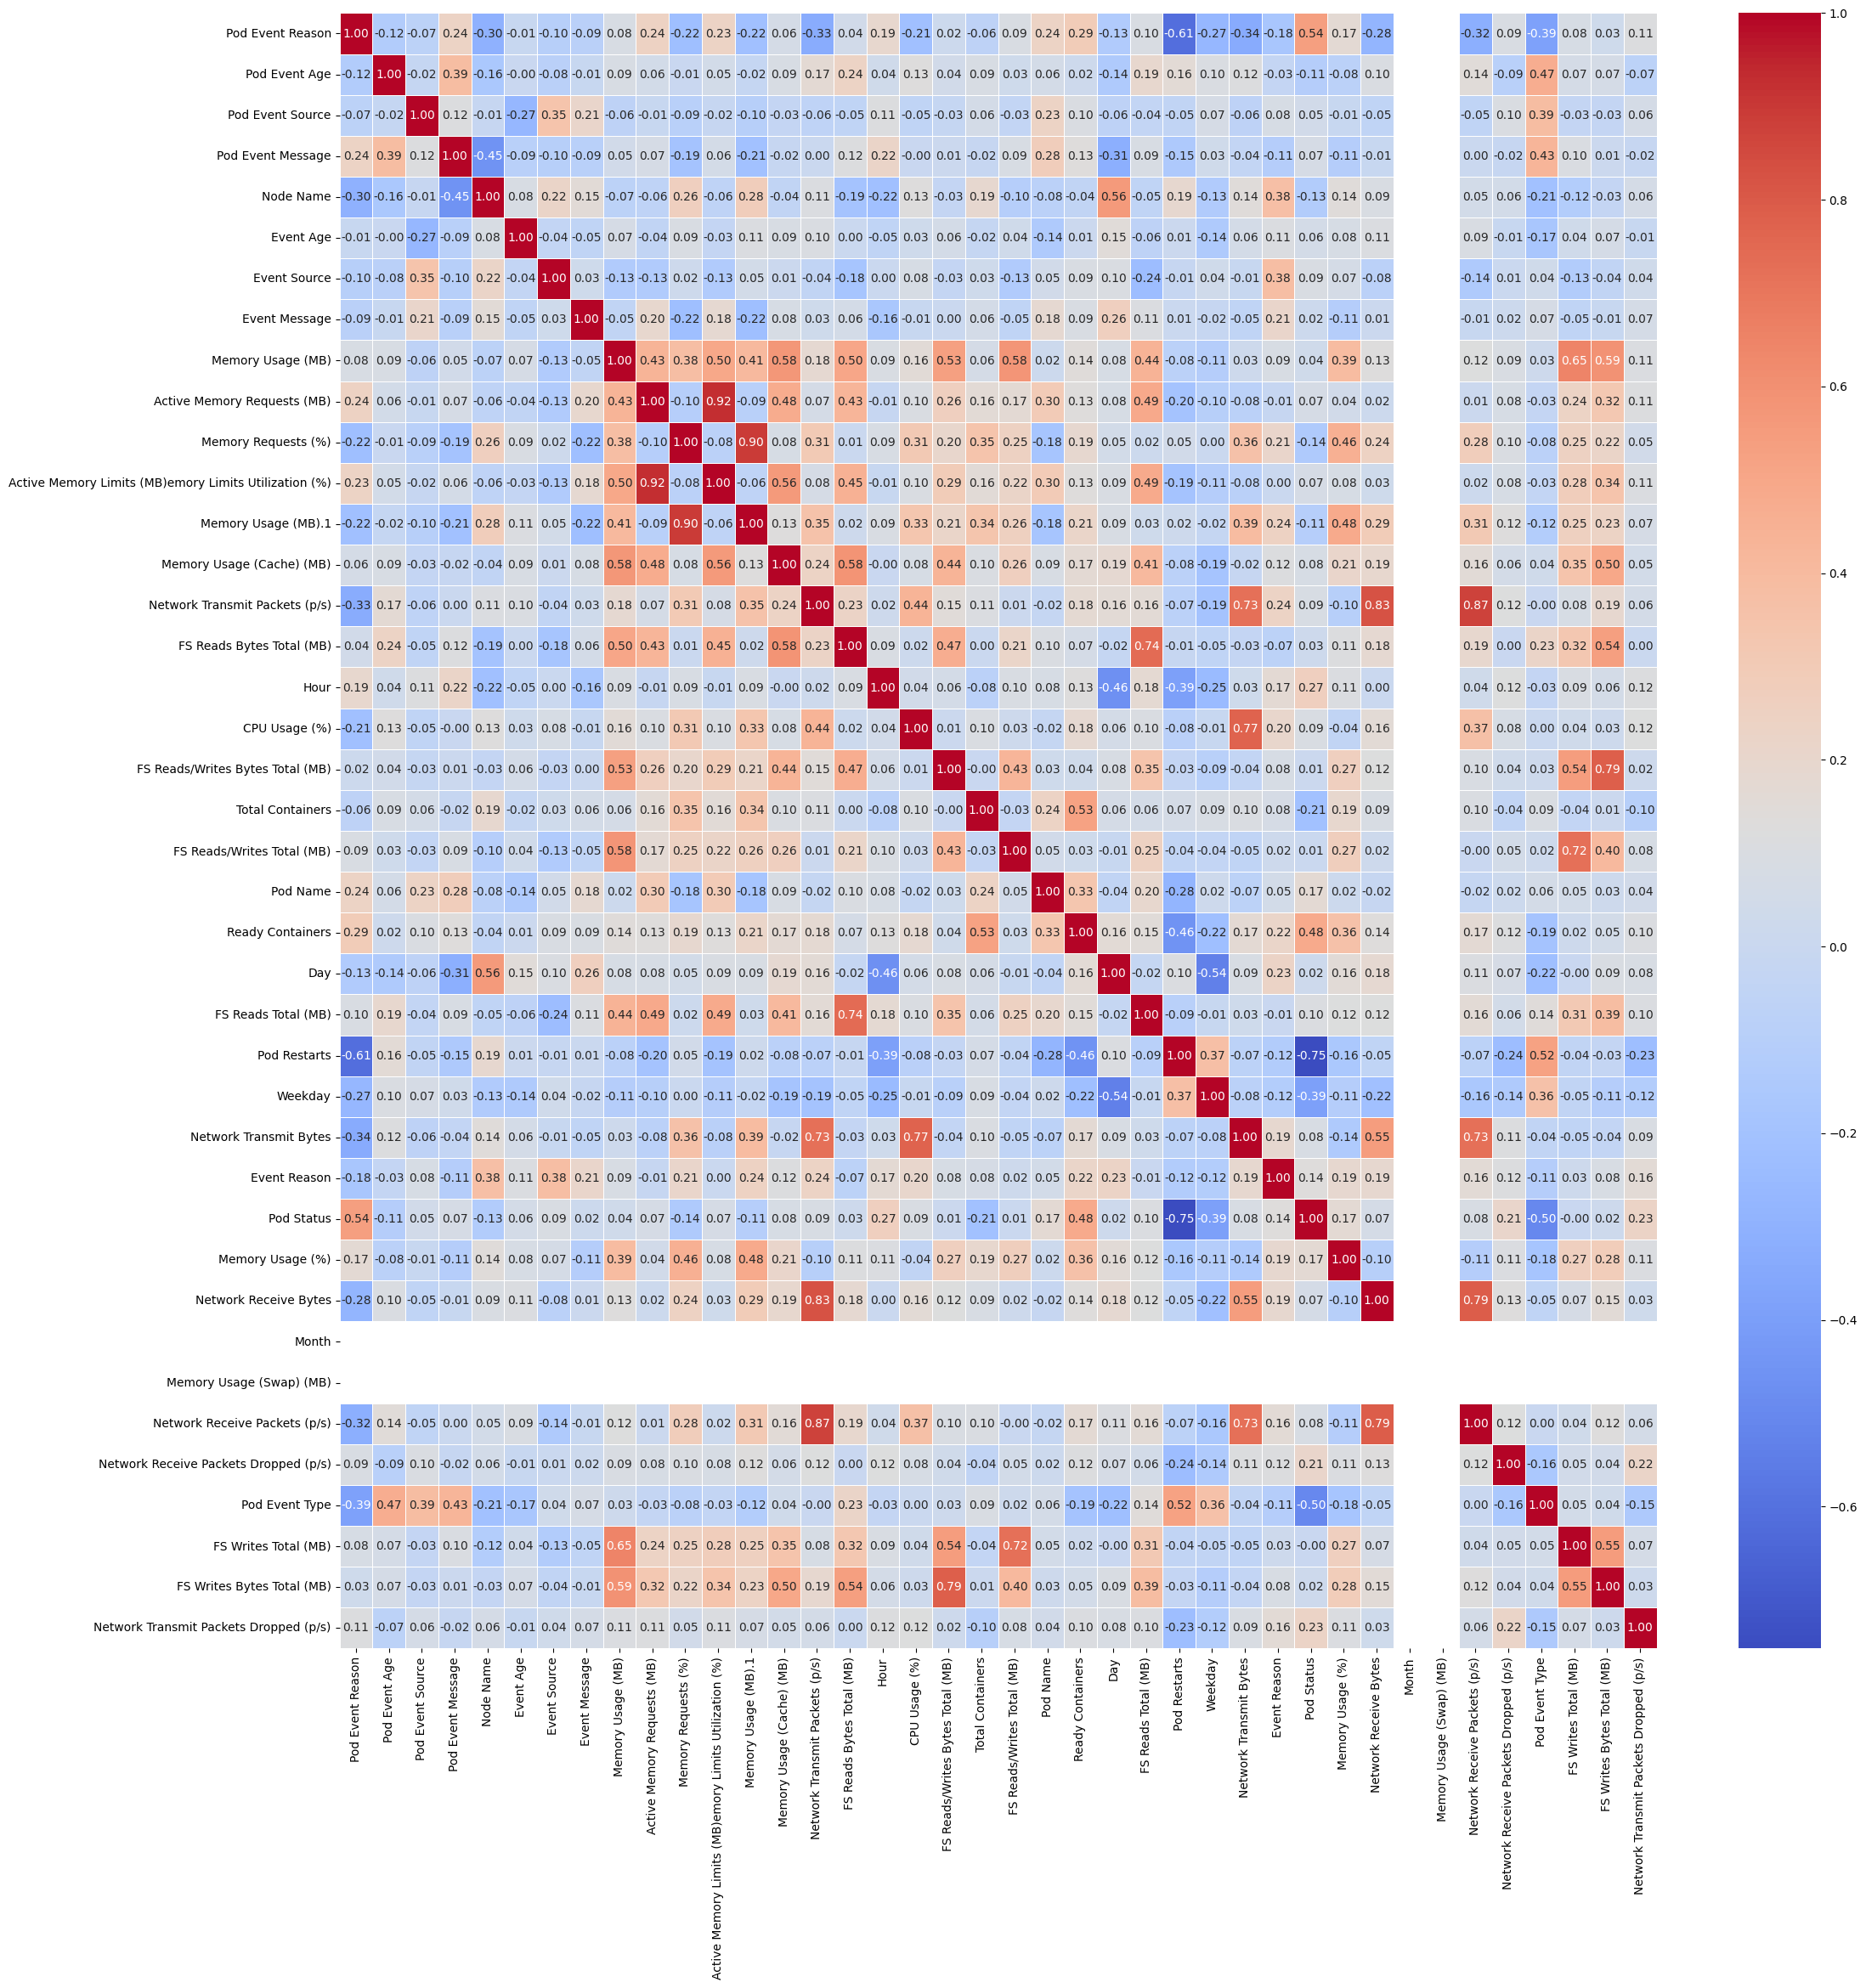

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix=df_prep.corr()
plt.figure(figsize=(25, 25))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.show()

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

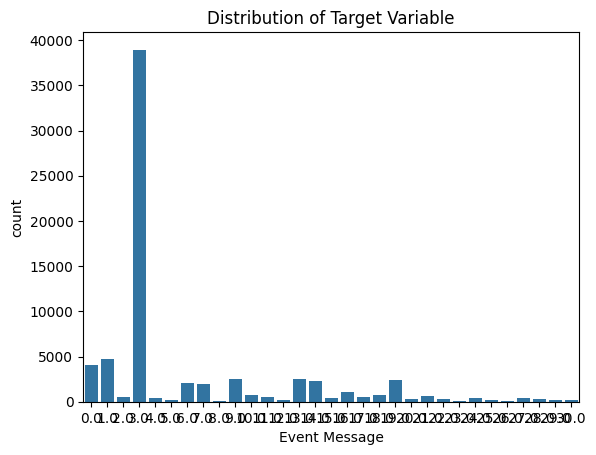

<Figure size 2500x5000 with 0 Axes>

In [128]:
sns.countplot(x=y_train) # Removed data=y
plt.title('Distribution of Target Variable')
plt.figure(figsize=(25, 50))
plt.show()

model without grid search and hyper parameter


In [129]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [130]:
print(accuracy)

0.5535666666666667


In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [132]:
print("accuracy of DCT:",accuracy)

accuracy of DCT: 0.8050666666666667


Naive Bayes Accuracy: 0.0959
              precision    recall  f1-score   support

         0.0       0.28      0.22      0.25      1748
         1.0       0.45      0.05      0.10      2079
         2.0       0.01      0.02      0.01       250
         3.0       0.90      0.03      0.06     16607
         4.0       0.04      0.52      0.07       128
         5.0       0.00      0.00      0.00        89
         6.0       0.80      0.38      0.51       902
         7.0       0.18      0.35      0.23       843
         8.0       0.00      0.02      0.01        51
         9.0       0.00      0.00      0.00      1067
        10.0       0.00      0.00      0.00       322
        11.0       0.00      0.00      0.00       181
        12.0       0.00      0.00      0.00        97
        13.0       0.11      0.52      0.19      1053
        14.0       0.25      0.31      0.28       955
        15.0       0.00      0.00      0.00       196
        16.0       0.00      0.00      0.00       50

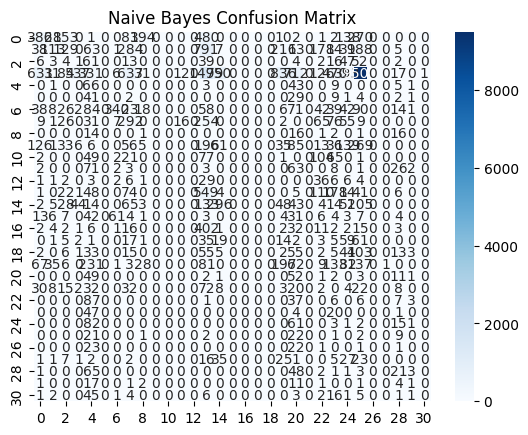

In [136]:
from sklearn.naive_bayes import GaussianNB

# Define model
nb = GaussianNB()

# Train model
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.show()


Random Forest Accuracy: 0.8739
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      1748
         1.0       0.94      0.94      0.94      2079
         2.0       0.78      0.49      0.60       250
         3.0       0.92      0.98      0.95     16607
         4.0       0.31      0.41      0.35       128
         5.0       0.77      0.22      0.35        89
         6.0       0.69      0.73      0.71       902
         7.0       0.91      0.97      0.94       843
         8.0       0.41      0.29      0.34        51
         9.0       0.66      0.66      0.66      1067
        10.0       0.91      0.89      0.90       322
        11.0       0.66      0.59      0.62       181
        12.0       0.82      0.47      0.60        97
        13.0       0.94      0.93      0.93      1053
        14.0       0.63      0.37      0.46       955
        15.0       0.84      0.28      0.42       196
        16.0       0.98      0.89      0.93       

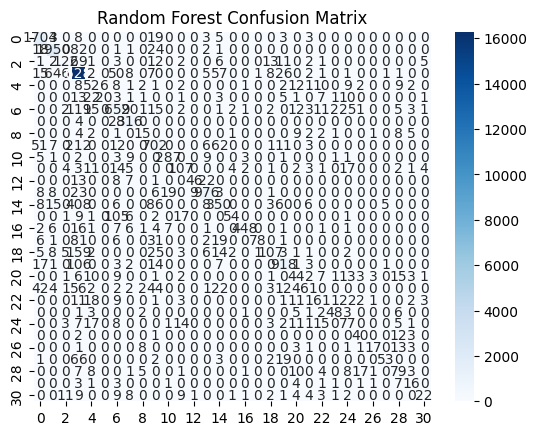

In [137]:
from sklearn.ensemble import RandomForestClassifier

# Define model with manually selected hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)

# Train model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


Logistic Regression Accuracy: 0.6632
              precision    recall  f1-score   support

         0.0       0.67      0.42      0.52      1748
         1.0       0.62      0.59      0.61      2079
         2.0       0.00      0.00      0.00       250
         3.0       0.70      0.98      0.82     16607
         4.0       0.07      0.18      0.10       128
         5.0       0.00      0.00      0.00        89
         6.0       0.80      0.39      0.53       902
         7.0       0.50      0.30      0.38       843
         8.0       0.00      0.00      0.00        51
         9.0       0.50      0.00      0.00      1067
        10.0       0.00      0.00      0.00       322
        11.0       0.00      0.00      0.00       181
        12.0       0.00      0.00      0.00        97
        13.0       0.42      0.77      0.55      1053
        14.0       0.50      0.02      0.04       955
        15.0       0.00      0.00      0.00       196
        16.0       0.10      0.03      0.04 

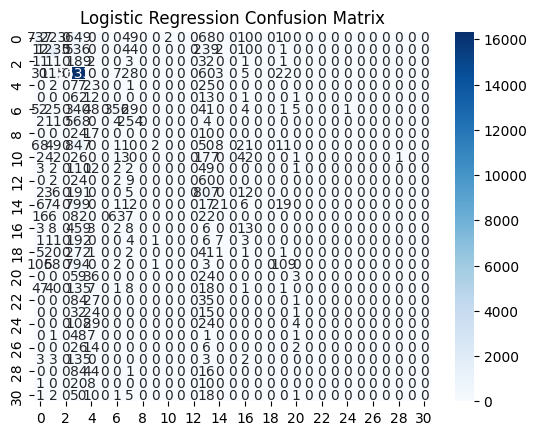

In [138]:
from sklearn.linear_model import LogisticRegression

# Define model with manually selected hyperparameters
lr = LogisticRegression(C=1, solver="liblinear", max_iter=1000, random_state=42)

# Train model
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


SVM Accuracy: 0.5727
              precision    recall  f1-score   support

         0.0       0.29      0.03      0.05      1748
         1.0       0.83      0.14      0.24      2079
         2.0       0.00      0.00      0.00       250
         3.0       0.57      0.99      0.72     16607
         4.0       0.00      0.00      0.00       128
         5.0       0.00      0.00      0.00        89
         6.0       0.80      0.36      0.49       902
         7.0       0.00      0.00      0.00       843
         8.0       0.00      0.00      0.00        51
         9.0       0.00      0.00      0.00      1067
        10.0       0.00      0.00      0.00       322
        11.0       0.00      0.00      0.00       181
        12.0       0.00      0.00      0.00        97
        13.0       0.00      0.00      0.00      1053
        14.0       0.00      0.00      0.00       955
        15.0       0.00      0.00      0.00       196
        16.0       0.00      0.00      0.00       502
      

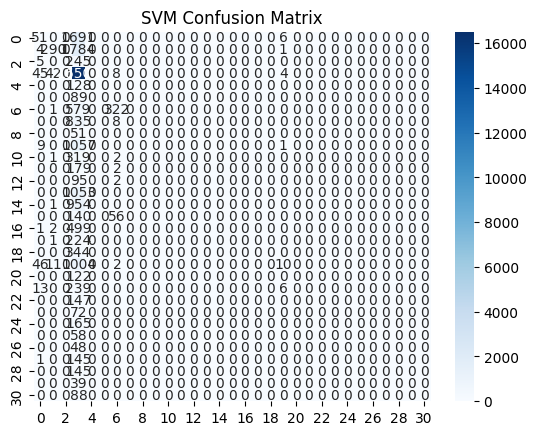

In [139]:
from sklearn.svm import SVC

# Define model with manually selected hyperparameters
svm = SVC(C=1, kernel="rbf", random_state=42)

# Train model
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluation
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


KNN Accuracy: 0.7125
              precision    recall  f1-score   support

         0.0       0.53      0.69      0.60      1748
         1.0       0.58      0.65      0.61      2079
         2.0       0.13      0.16      0.14       250
         3.0       0.84      0.93      0.88     16607
         4.0       0.05      0.12      0.07       128
         5.0       0.09      0.07      0.08        89
         6.0       0.53      0.44      0.48       902
         7.0       0.80      0.81      0.80       843
         8.0       0.08      0.08      0.08        51
         9.0       0.40      0.24      0.30      1067
        10.0       0.46      0.44      0.45       322
        11.0       0.13      0.14      0.14       181
        12.0       0.54      0.27      0.36        97
        13.0       0.71      0.66      0.69      1053
        14.0       0.41      0.19      0.26       955
        15.0       0.13      0.05      0.07       196
        16.0       0.81      0.76      0.78       502
      

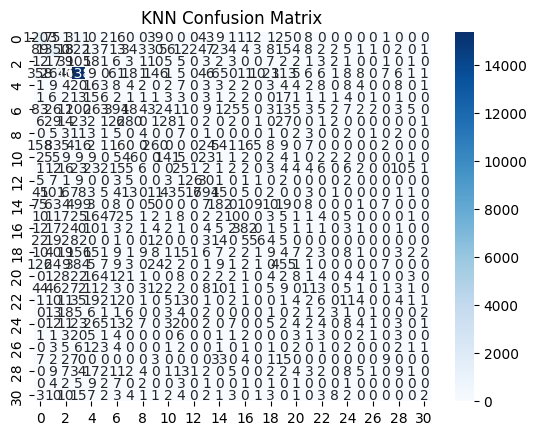

In [141]:
from sklearn.neighbors import KNeighborsClassifier

# Define model with manually selected hyperparameters
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")

# Train model
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()


XGBoost Accuracy: 0.8743
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1748
         1.0       0.93      0.94      0.94      2079
         2.0       0.81      0.46      0.58       250
         3.0       0.93      0.98      0.95     16607
         4.0       0.32      0.41      0.36       128
         5.0       0.73      0.36      0.48        89
         6.0       0.67      0.73      0.70       902
         7.0       0.93      0.96      0.94       843
         8.0       0.50      0.39      0.44        51
         9.0       0.68      0.66      0.67      1067
        10.0       0.93      0.89      0.90       322
        11.0       0.60      0.57      0.58       181
        12.0       0.81      0.49      0.62        97
        13.0       0.93      0.93      0.93      1053
        14.0       0.58      0.42      0.48       955
        15.0       0.57      0.31      0.40       196
        16.0       0.96      0.90      0.93       502
  

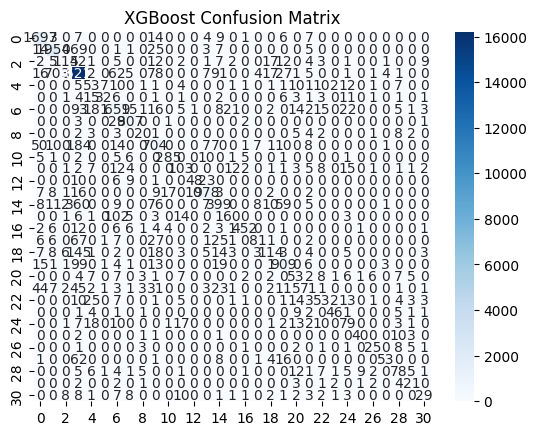

In [142]:
from xgboost import XGBClassifier

# Define model with manually selected hyperparameters
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train model
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()


MLP Accuracy: 0.6707
              precision    recall  f1-score   support

         0.0       0.76      0.43      0.55      1748
         1.0       0.80      0.75      0.78      2079
         2.0       1.00      0.02      0.04       250
         3.0       0.66      0.97      0.79     16607
         4.0       0.00      0.00      0.00       128
         5.0       0.00      0.00      0.00        89
         6.0       0.00      0.00      0.00       902
         7.0       0.00      0.00      0.00       843
         8.0       0.00      0.00      0.00        51
         9.0       0.37      0.32      0.34      1067
        10.0       0.00      0.00      0.00       322
        11.0       0.00      0.00      0.00       181
        12.0       0.00      0.00      0.00        97
        13.0       0.79      0.64      0.70      1053
        14.0       0.52      0.19      0.28       955
        15.0       0.00      0.00      0.00       196
        16.0       0.98      0.79      0.88       502
      

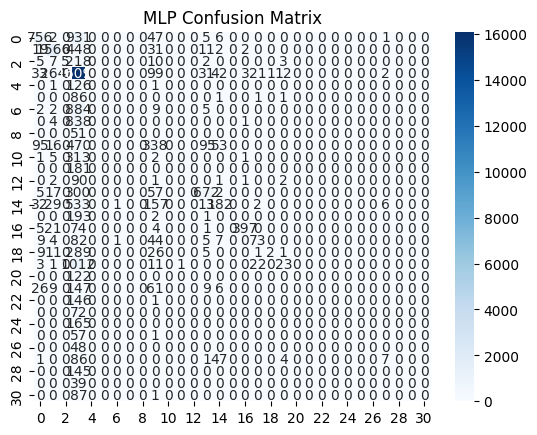

In [143]:
from sklearn.neural_network import MLPClassifier

# Define MLP model with manually selected hyperparameters
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
                    max_iter=500, alpha=0.0001, random_state=42)

# Train model
mlp.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test)

# Evaluation
print(f"MLP Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='Blues')
plt.title("MLP Confusion Matrix")
plt.show()


model with grid search and hyper parameter


Decision Tree Accuracy: 0.8310
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      1748
         1.0       0.95      0.91      0.93      2079
         2.0       0.18      0.22      0.20       250
         3.0       0.90      0.97      0.94     16607
         4.0       0.09      0.76      0.15       128
         5.0       0.00      0.00      0.00        89
         6.0       0.68      0.64      0.66       902
         7.0       0.92      0.95      0.93       843
         8.0       0.00      0.00      0.00        51
         9.0       0.55      0.65      0.60      1067
        10.0       0.90      0.85      0.88       322
        11.0       0.37      0.41      0.39       181
        12.0       0.57      0.16      0.26        97
        13.0       0.92      0.91      0.92      1053
        14.0       0.58      0.26      0.36       955
        15.0       0.12      0.01      0.02       196
        16.0       0.97      0.85      0.91       

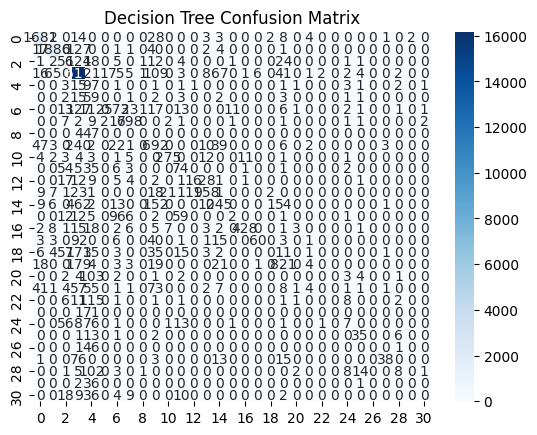

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define model
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning
params = {"max_depth": [10, 20, None], "min_samples_split": [2, 5, 10]}
grid = GridSearchCV(dt, params, cv=TimeSeriesSplit(n_splits=5), scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

# Train with best parameters
best_dt = grid.best_estimator_
best_dt.fit(X_train, y_train)

# Predictions
y_pred_dt = best_dt.predict(X_test)

# Evaluation
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


Naive Bayes Accuracy: 0.0959
              precision    recall  f1-score   support

         0.0       0.28      0.22      0.25      1748
         1.0       0.45      0.05      0.10      2079
         2.0       0.01      0.02      0.01       250
         3.0       0.90      0.03      0.06     16607
         4.0       0.04      0.52      0.07       128
         5.0       0.00      0.00      0.00        89
         6.0       0.80      0.38      0.51       902
         7.0       0.18      0.35      0.23       843
         8.0       0.00      0.02      0.01        51
         9.0       0.00      0.00      0.00      1067
        10.0       0.00      0.00      0.00       322
        11.0       0.00      0.00      0.00       181
        12.0       0.00      0.00      0.00        97
        13.0       0.11      0.52      0.19      1053
        14.0       0.25      0.31      0.28       955
        15.0       0.00      0.00      0.00       196
        16.0       0.00      0.00      0.00       50

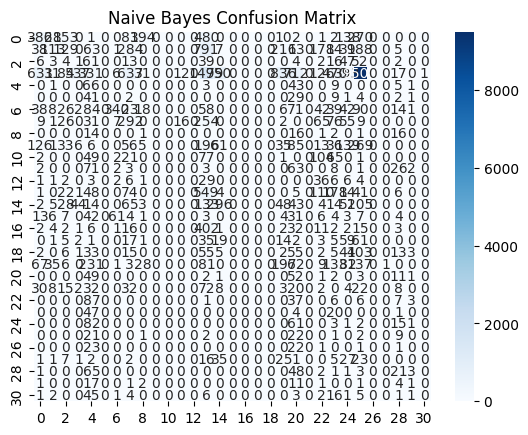

In [145]:
from sklearn.naive_bayes import GaussianNB

# Define model
nb = GaussianNB()

# Train model
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.show()


Random Forest Accuracy: 0.8758
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      1748
         1.0       0.94      0.94      0.94      2079
         2.0       0.83      0.49      0.61       250
         3.0       0.92      0.98      0.95     16607
         4.0       0.29      0.44      0.35       128
         5.0       0.81      0.28      0.42        89
         6.0       0.69      0.75      0.71       902
         7.0       0.92      0.96      0.94       843
         8.0       0.50      0.33      0.40        51
         9.0       0.68      0.66      0.67      1067
        10.0       0.92      0.90      0.91       322
        11.0       0.69      0.60      0.64       181
        12.0       0.84      0.44      0.58        97
        13.0       0.94      0.93      0.93      1053
        14.0       0.64      0.39      0.48       955
        15.0       0.80      0.28      0.42       196
        16.0       0.99      0.90      0.94       

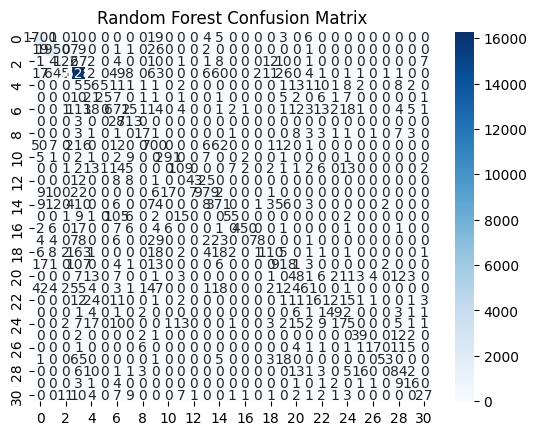

In [146]:
from sklearn.ensemble import RandomForestClassifier

# Define model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning
params = {"n_estimators": [100, 200], "max_depth": [10, 20, None]}
grid = GridSearchCV(rf, params, cv=TimeSeriesSplit(n_splits=5), scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

# Train with best parameters
best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluation
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Define model
lr = LogisticRegression(random_state=42, max_iter=1000)

# Hyperparameter tuning
params = {"C": [0.1, 1, 10], "solver": ["liblinear", "lbfgs"]}
grid = GridSearchCV(lr, params, cv=TimeSeriesSplit(n_splits=5), scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

# Train with best parameters
best_lr = grid.best_estimator_
best_lr.fit(X_train, y_train)

# Predictions
y_pred_lr = best_lr.predict(X_test)

# Evaluation
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [ ]:
from sklearn.svm import SVC

# Define model
svm = SVC(random_state=42)

# Hyperparameter tuning
params = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
grid = GridSearchCV(svm, params, cv=TimeSeriesSplit(n_splits=5), scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

# Train with best parameters
best_svm = grid.best_estimator_
best_svm.fit(X_train, y_train)

# Predictions
y_pred_svm = best_svm.predict(X_test)

# Evaluation
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define model
knn = KNeighborsClassifier()

# Hyperparameter tuning
params = {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
grid = GridSearchCV(knn, params, cv=TimeSeriesSplit(n_splits=5), scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

# Train with best parameters
best_knn = grid.best_estimator_
best_knn.fit(X_train, y_train)

# Predictions
y_pred_knn = best_knn.predict(X_test)

# Evaluation
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()


XGBoost Accuracy: 0.8743
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1748
         1.0       0.93      0.94      0.94      2079
         2.0       0.81      0.46      0.58       250
         3.0       0.93      0.98      0.95     16607
         4.0       0.32      0.41      0.36       128
         5.0       0.73      0.36      0.48        89
         6.0       0.67      0.73      0.70       902
         7.0       0.93      0.96      0.94       843
         8.0       0.50      0.39      0.44        51
         9.0       0.68      0.66      0.67      1067
        10.0       0.93      0.89      0.90       322
        11.0       0.60      0.57      0.58       181
        12.0       0.81      0.49      0.62        97
        13.0       0.93      0.93      0.93      1053
        14.0       0.58      0.42      0.48       955
        15.0       0.57      0.31      0.40       196
        16.0       0.96      0.90      0.93       502
  

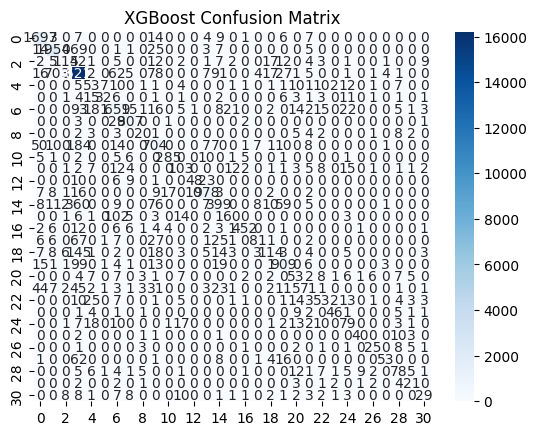

In [149]:
from xgboost import XGBClassifier

# Define model
xgb = XGBClassifier()

# Hyperparameter tuning
params = {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]}
grid = GridSearchCV(xgb, params, cv=TimeSeriesSplit(n_splits=5), scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

# Train with best parameters
best_xgb = grid.best_estimator_
best_xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = best_xgb.predict(X_test)

# Evaluation
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()
